In [1]:
# Generate top topics for documents using NMF
# Outputs a dataframe for each app with top 3 topics they are related to, and the topics' probabilities

# Partly inspired by NMF topic modelling tutorial
# at https://www.kaggle.com/code/rockystats/topic-modelling-using-nmf

import pandas as pd

from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

# set number of topics
num_topics=8

# Final comparison done with 46 topics
num_topics = 46

# read in the document data
df = pd.read_csv('../../data/enriched_data.csv')

documents = df['PreprocessedDescription']


In [2]:
vectorizer = TfidfVectorizer(
    min_df=3,        #don't add terms that appear less than 3 of the descriptions to the vocabulary
    max_features=2000, # limit to 2000 most frequent terms
    ngram_range=(1, 1)
)


tfidf_vocabulary = vectorizer.fit_transform(documents)
tfidf_word_id_map = vectorizer.get_feature_names_out()


In [6]:
# Do the non-negative matrix factorization

# XXX: we could use Octis optimizer here to compare the results more thoroughly
nmf = NMF(
    random_state=1,
    n_components=num_topics, # number of topics to generate
    init='nndsvd',
    solver='cd'
    #init='nndsvda',
    #solver='mu' # multiplicative update
).fit(tfidf_vocabulary)


/Users/tsido/opt/anaconda3/envs/datasci-intro/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [7]:
# Getting a df with each topic by document
H_doc_by_topic = nmf.transform(vectorizer.transform(documents))

n_topic_words = 5

topics = {}
for topic_idx, topic in enumerate(nmf.components_):
    t = (topic_idx)
    topics[t] = ' '.join([tfidf_word_id_map[i] for i in topic.argsort()[:(-n_topic_words - 1): -1]])


In [8]:
# get top 3 scoring topics and create a data frame that contains the topics and the original document text
docweights = H_doc_by_topic

topic_strings = []
topic_probabilities = []
n_top_topics = 3

for weight in docweights:
    top_topic_idx = weight.argsort()[::-1][:n_top_topics]
    topic_strings.append([topics[i] for i in top_topic_idx])
    topic_probabilities.append([weight[i] for i in top_topic_idx])

topic_df = pd.concat([df['App_Name'], df['AppStoreGenres'], documents, pd.DataFrame(topic_strings), pd.DataFrame(topic_probabilities)], axis=1)
topic_df.columns = ['AppName', 'AppStoreGenres', 'TrimmedDescription', 'Topic_1', 'Topic_2', 'Topic_3', 'Topic_1_p', 'Topic_2_p', 'Topic_3_p']



In [9]:
topic_df


,AppName,AppStoreGenres,TrimmedDescription,Topic_1,Topic_2,Topic_3,Topic_1_p,Topic_2_p,Topic_3_p
0,AAA³ Little Ponies & Unicorns,"['Games', 'Role Playing', 'Adventure', 'Books']",welcome land fairies puzzle game toddlers kids...,kids learning fun educational learn,puzzles puzzle jigsaw pieces solve,game center best playing simple,0.070338,0.045531,0.012952
1,GA1: An Assassin in Orlandes,"['Games', 'Books', 'Role Playing']",interactive fantasy adventure book game rpg ga...,dice roll rolls rolling die,hidden adventure object objects story,iphone ipad touch ipod universal,0.053471,0.051283,0.021398
2,Baby Games App (by HAPPYTOUCH®),"['Games', 'Books', 'Family']",plenty press touch explore children ages happy...,children child learning learn parents,app free store purchases apps,numbers number math brain correct,0.096866,0.062367,0.042925
3,Hadean Lands,"['Games', 'Puzzle', 'Books']",winner xyzzy interactive fiction awards best p...,hidden adventure object objects story,puzzles puzzle jigsaw pieces solve,tap screen button left right,0.044730,0.032108,0.015665
4,Pango and friends,"['Games', 'Family', 'Books']",discover unpublished pango stories interactive...,english spanish french german italian,children child learning learn parents,baby dress pet little cute,0.070599,0.034318,0.024574
...,...,...,...,...,...,...,...,...,...
12896,Touchdown Hero: New Season,"['Games', 'Sports', 'Sports', 'Casual']",new season finally field outmanoeuvre defender...,score points high scores bonus,new unlock brand experience create,player board players pieces opponent,0.054992,0.037055,0.026086
12897,Hidden Objects USA Time Object,"['Games', 'Puzzle', 'Travel', 'Role Playing']",vacation usa explore beautiful travel spots me...,hidden adventure object objects story,levels level difficulty challenging complete,word words letters letter search,0.090125,0.036382,0.032140
12898,Slots! Golden Cherry,"['Games', 'Simulation', 'Casino', 'Sports']",number casino slot machine real play free fore...,slots casino slot vegas win,play friends online players multiplayer,fun great addictive graphics music,0.114446,0.014934,0.013825
12899,XAirports,"['Games', 'Simulation', 'Utilities']",xairports utility app allows owner popular fli...,space enemy ships alien ship,world real best city players,app free store purchases apps,0.028102,0.017762,0.016239


In [ ]:
# Explore the results

# get the most high scores for each unique topic
topic_df.groupby('Topic_1').max().sort_values(by='Topic_1_p', ascending=False)


,AppName,TrimmedDescription,Topic_2,Topic_3,Topic_1_p,Topic_2_p,Topic_3_p
Topic_1,,,,,,,
poker texas chips hold video,Zynga Poker - Texas Holdem,＊＊＊ play way success ＊＊＊ video poker player wo...,world compete real best countries,world compete real best countries,0.286672,0.106967,0.060500
truck garbage trucks monster vehicles,Wrecking Ball Truck,young children fascinated things colorful puzz...,zombies zombie weapons undead survive,world compete real best countries,0.261841,0.086610,0.066118
und die der med des,Wissenstraining. Das Quiz.,„wer war ist genau die richtige wahl für logik...,tiles mahjong tile board remove,zombies zombie weapons undead survive,0.260091,0.119044,0.046957
tac tic toe player row,XOX: Tic Tac Toe,xox tic tac toe naughts crosses game high scor...,world compete real best countries,world compete real best countries,0.256067,0.083765,0.043135
dice roll rolls board rolling,YourGameDice,“there’s wonderfully freeing restricting ages ...,world compete real best countries,world compete real best countries,0.255778,0.122946,0.054610
chess moves board pieces games,World Chess Championship,“shogi” classic board game popularly played pa...,world compete real best countries,world compete real best countries,0.237670,0.114309,0.071622
zombies zombie weapons undead survive,Zompy Jumpy - Zombie Jump,★★★★★ tired building best farm try destroying ...,world compete real best countries,world compete real best countries,0.237260,0.113296,0.046638
sudoku notes grid column row,Zendoku,‘sudoku sudoku game combines classic sudoku ga...,world compete real best countries,world compete real best countries,0.234414,0.110753,0.059992
christmas santa presents holiday time,Xmas Jigsaws Puzzle Game: Farm,•pop groups christmas bubbles icon •collect sc...,zombies zombie weapons undead survive,zombies zombie weapons undead survive,0.233481,0.109844,0.061681


In [10]:
# Most dominant topic across the documents based on the probability
topic_df.groupby('Topic_1').sum('Topic_1_p').sort_values(by='Topic_1_p', ascending=False)


,Topic_1_p,Topic_2_p,Topic_3_p
Topic_1,,,
jump coins run obstacles collect,46.866540,21.192247,13.971913
ball balls bowling physics soccer,43.086044,16.918148,10.396848
puzzles puzzle jigsaw pieces solve,40.948573,20.756065,13.598835
hidden adventure object objects story,39.756016,17.419378,11.007681
cards card deck suit pile,32.411589,14.324682,8.875826
subscription period account renewal charged,32.189874,9.769553,5.814478
world real best city players,31.653638,19.674214,13.066768
children child learning learn parents,31.149058,16.217332,10.897882
word words letters letter search,29.788148,13.958206,8.671551


In [11]:
# Most frequent topics across the documents based on counts, i.e. which topic appears the most
# regardless of the probability sum
topic_df.groupby('Topic_1').count().sort_values(by='Topic_1_p', ascending=False)


,AppName,AppStoreGenres,TrimmedDescription,Topic_2,Topic_3,Topic_1_p,Topic_2_p,Topic_3_p
Topic_1,,,,,,,,
jump coins run obstacles collect,635,635,635,635,635,635,635,635
world real best city players,555,555,555,555,555,555,555,555
baby dress pet little cute,533,533,533,533,533,533,533,533
hidden adventure object objects story,519,519,519,519,519,519,519,519
puzzles puzzle jigsaw pieces solve,510,510,510,510,510,510,510,510
iphone ipad touch ipod universal,500,500,500,500,500,500,500,500
new unlock brand experience create,485,485,485,485,485,485,485,485
app free store purchases apps,471,471,471,471,471,471,471,471
space enemy ships alien ship,464,464,464,464,464,464,464,464


In [12]:

import topicwizard
from topicwizard.pipeline import make_topic_pipeline

from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer()
#nmf = NMF(n_components=num_topics)
pipeline = make_topic_pipeline(bow_vectorizer, nmf)
pipeline.fit(documents)

# commented for not accidentally running this as it's slow
app = topicwizard.visualize(corpus=documents, pipeline=pipeline)



/Users/tsido/opt/anaconda3/envs/datasci-intro/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Preprocessing


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [ ]:
topics


{0: 'game center simple best playing',
 1: 'word words letters letter search',
 2: 'solitaire cards card klondike spider',
 3: 'kids learning fun educational games',
 4: 'subscription period account renewal gameclub',
 5: 'puzzles puzzle jigsaw pieces solve',
 6: 'fish big games discover enjoy',
 7: 'play player players online multiplayer',
 8: 'battle enemies enemy war weapons',
 9: 'car racing cars race tracks',
 10: 'iphone ipad touch ipod universal',
 11: 'english spanish french german languages',
 12: 'tiles mahjong tile board remove',
 13: 'slots casino slot vegas win',
 14: 'numbers number math brain color',
 15: 'chess moves board pieces games',
 16: 'guess friends facebook share challenge',
 17: 'escape room objects solve download',
 18: 'levels level difficulty challenging complete',
 19: 'ball balls bowling physics soccer',
 20: 'bubble bubbles pop shooter popping',
 21: 'sudoku notes grid column row',
 22: 'questions trivia quiz knowledge answer',
 23: 'truck garbage trucks

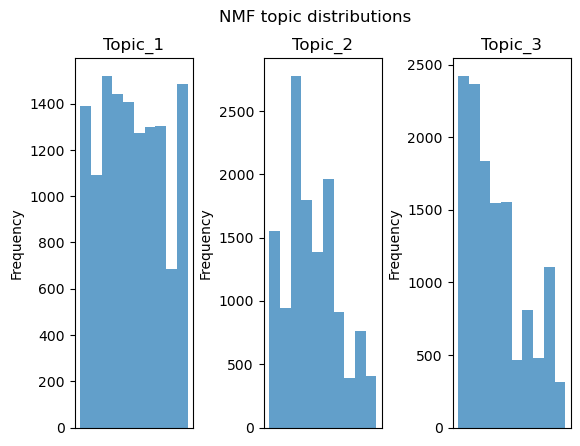

In [ ]:
import matplotlib.pyplot as plt

columns = ['Topic_1', 'Topic_2','Topic_3']

fig, ax = plt.subplots(nrows=1, ncols=3)
for i, column in enumerate(columns):
    ax[i].hist(topic_df[column], alpha=0.7)
    ax[i].set_title(column)
    ax[i].set_ylabel('Frequency')
    ax[i].get_xaxis().set_visible(False)

plt.suptitle('NMF topic distributions')
plt.subplots_adjust(wspace=0.6)
plt.show()


In [ ]:
import numpy as np

doc_topic_matrix = np.array(H_doc_by_topic)


cumulative_topic_probabilities = doc_topic_matrix.sum(axis=0)

#for doc_probabilities in doc_topic_matrix:
#     print(doc_probabilities)
    #for (topic_id, prob) in doc_topics:
    #  cumulative_topic_probabilities[topic_id] += prob
# topic probabilities
sorted_topic_indexes = np.argsort(-cumulative_topic_probabilities)
print(sorted_topic_indexes)

for i in sorted_topic_indexes:
    print(topics[i])


[ 0  7 28  8 40 38 18 10  5 37 44  2 43 24 34  1 32  3 16 45 33  6  9 19
 14 36  4 13 12 22 41 11 25 26 17 30 20 29 15 21 27 39 23 35 31 42]
game center simple best playing
play player players online multiplayer
fun great graphics music addictive
battle enemies enemy war weapons
app free real money purchases
new games unlock create best
levels level difficulty challenging complete
iphone ipad touch ipod universal
puzzles puzzle jigsaw pieces solve
score points high scores bonus
world compete real best countries
solitaire cards card klondike spider
jump run coins obstacles collect
adventure story island characters mysterious
children child learning parents learn
word words letters letter search
tap screen button left right
kids learning fun educational games
guess friends facebook share challenge
baby dress pet little hair
mode modes challenge time arcade
fish big games discover enjoy
car racing cars race tracks
ball balls bowling physics soccer
numbers number math brain color
hidden ob

/Users/tsido/opt/anaconda3/envs/datasci-intro/lib/python3.10/site-packages/topicwizard/prepare/topics.py:92: RuntimeWarning:

divide by zero encountered in log

/Users/tsido/opt/anaconda3/envs/datasci-intro/lib/python3.10/site-packages/topicwizard/prepare/topics.py:94: RuntimeWarning:

invalid value encountered in divide

/Users/tsido/opt/anaconda3/envs/datasci-intro/lib/python3.10/site-packages/topicwizard/prepare/topics.py:94: RuntimeWarning:

divide by zero encountered in log

/Users/tsido/opt/anaconda3/envs/datasci-intro/lib/python3.10/site-packages/topicwizard/prepare/topics.py:92: RuntimeWarning:

divide by zero encountered in log

/Users/tsido/opt/anaconda3/envs/datasci-intro/lib/python3.10/site-packages/topicwizard/prepare/topics.py:94: RuntimeWarning:

invalid value encountered in divide

/Users/tsido/opt/anaconda3/envs/datasci-intro/lib/python3.10/site-packages/topicwizard/prepare/topics.py:94: RuntimeWarning:

divide by zero encountered in log



In [16]:
from scipy.stats.contingency import association
from scipy.stats import chi2_contingency

import random

# Investigate the association betwen the original categories and the generated topics



# Calculate Cramer's V between topics and the original categories

# First encode the top 3 topics for each document into a single string that contains the
# sorted topics, i.e. the order of the topics does not matter
topic_df['encoded_topics'] = topic_df.apply(lambda x: ' '.join(sorted([x['Topic_1'], x['Topic_2']])), axis=1)

# Then do the same for the categories contained in the metadata (i.e. sort the AppStoreGenreIds column)
# and encode them into a single string
topic_df['encoded_categories'] = topic_df.apply(lambda x: ' '.join(sorted(eval(x['AppStoreGenres']))), axis=1)


# Chi squared
contingency_table = pd.crosstab(topic_df['encoded_topics'], topic_df['encoded_categories'])
print(chi2_contingency(contingency_table))

print("Association Cramer's V:", association(contingency_table, method="cramer"))




(793446.7776715718, 0.0, 621084, array([[1.24021394e-03, 4.96085575e-03, 2.44322146e-01, ...,
        2.23238509e-02, 1.24021394e-03, 3.72064181e-03],
       [3.33307496e-03, 1.33322998e-02, 6.56615766e-01, ...,
        5.99953492e-02, 3.33307496e-03, 9.99922487e-03],
       [7.75133711e-05, 3.10053484e-04, 1.52701341e-02, ...,
        1.39524068e-03, 7.75133711e-05, 2.32540113e-04],
       ...,
       [3.87566855e-04, 1.55026742e-03, 7.63506705e-02, ...,
        6.97620340e-03, 3.87566855e-04, 1.16270057e-03],
       [7.75133711e-05, 3.10053484e-04, 1.52701341e-02, ...,
        1.39524068e-03, 7.75133711e-05, 2.32540113e-04],
       [1.93783428e-03, 7.75133711e-03, 3.81753352e-01, ...,
        3.48810170e-02, 1.93783428e-03, 5.81350283e-03]]))
Association Cramer's V: 0.2945263092054257


In [20]:
contingency_table

encoded_categories,Action Adventure Books Games,Action Adventure Education Games,Action Adventure Entertainment Games,Action Adventure Games,Action Adventure Games Lifestyle,Action Adventure Games Music,Action Adventure Games News,Action Adventure Games Reference,Action Adventure Games Social Networking,Action Adventure Games Sports,...,Games Strategy,Games Strategy Utilities Word,Games Travel Trivia Word,Games Trivia,Games Trivia Utilities,Games Trivia Word,Games Utilities,Games Word,Lifestyle Travel,Productivity Utilities
encoded_topics,,,,,,,,,,,,,,,,,,,,,
animals animal farm zoo sounds app free store purchases apps,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
animals animal farm zoo sounds baby dress pet little cute,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
animals animal farm zoo sounds ball balls bowling physics soccer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
animals animal farm zoo sounds battle enemies heroes monsters fight,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
animals animal farm zoo sounds blocks color block match coloring,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
truck garbage trucks monster vehicles world real best city players,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
truck garbage trucks monster vehicles zombies zombie weapons undead survive,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
word words letters letter search world real best city players,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [69]:
# filter out encoded_topics and encoded_categories that have less than 100 occurences
# to test the association between the most relevant topics and categories separately,
# as this affects the degree of freedom in the chi squared test significantly
#
# filter topics that have less than 5 occurrences
encoded_topic_counts = topic_df['encoded_topics'].value_counts()
topic_filter = encoded_topic_counts[encoded_topic_counts >= 100]


encoded_category_counts = topic_df['encoded_categories'].value_counts()
category_filter = encoded_category_counts[encoded_category_counts >= 100]

# create a data frame that contains only the filtered topics and categories
# TODO is this correct?
filtered_topic_df = topic_df[topic_df['encoded_topics'].isin(topic_filter.index) & topic_df['encoded_categories'].isin(category_filter.index)]


filtered_contingency_table = pd.crosstab(filtered_topic_df['encoded_topics'], filtered_topic_df['encoded_categories'])
print(chi2_contingency(filtered_contingency_table))

print("Association Cramer's V:", association(filtered_contingency_table, method="cramer"))


print("Different categories", len(category_filter))
print("Different topic combos", len(topic_filter))
filtered_topic_df

(958.5711312996198, 5.8343669311648495e-118, 150, array([[0.75483871, 3.52258065, 2.13870968, 1.13225806, 5.28387097,
        2.89354839, 2.51612903, 1.88709677, 0.12580645, 0.37741935,
        0.2516129 , 0.75483871, 3.6483871 , 0.50322581, 1.25806452,
        0.12580645, 1.63548387, 0.12580645, 0.50322581, 0.12580645,
        1.88709677, 0.62903226, 4.1516129 , 0.2516129 , 0.2516129 ,
        2.26451613],
       [0.65806452, 3.07096774, 1.86451613, 0.98709677, 4.60645161,
        2.52258065, 2.19354839, 1.64516129, 0.10967742, 0.32903226,
        0.21935484, 0.65806452, 3.18064516, 0.43870968, 1.09677419,
        0.10967742, 1.42580645, 0.10967742, 0.43870968, 0.10967742,
        1.64516129, 0.5483871 , 3.61935484, 0.21935484, 0.21935484,
        1.97419355],
       [0.56129032, 2.61935484, 1.59032258, 0.84193548, 3.92903226,
        2.1516129 , 1.87096774, 1.40322581, 0.09354839, 0.28064516,
        0.18709677, 0.56129032, 2.71290323, 0.37419355, 0.93548387,
        0.09354839, 1.21

,AppName,AppStoreGenres,TrimmedDescription,Topic_1,Topic_2,Topic_3,Topic_1_p,Topic_2_p,Topic_3_p,encoded_topics,encoded_categories
335,Calculation Solitaire,"['Games', 'Entertainment', 'Board', 'Card']",calculation solitaire challenging game thinkin...,cards card deck suit pile,solitaire spider klondike games freecell,app free store purchases apps,0.073225,0.040078,0.015925,cards card deck suit pile solitaire spider klo...,Board Card Entertainment Games
489,Jack the Ripper - Letters from Hell (FULL) – E...,"['Games', 'Puzzle', 'Adventure', 'Entertainment']",extended edition finally arrived new puzzles n...,hidden adventure object objects story,new unlock brand experience create,score points high scores bonus,0.061730,0.055228,0.013865,hidden adventure object objects story new unlo...,Adventure Entertainment Games Puzzle
508,Echoes - Season 1: Greenhearth,"['Games', 'Entertainment', 'Role Playing', 'Ad...",ricky fox brilliant detective nypd best friend...,hidden adventure object objects story,new unlock brand experience create,questions trivia quiz knowledge answer,0.083436,0.039905,0.013612,hidden adventure object objects story new unlo...,Adventure Entertainment Games Role Playing
695,Dash Man,"['Games', 'Casual', 'Action', 'Entertainment']",far paint help dash man paint town fast runner...,jump coins run obstacles collect,tap screen button left right,baby dress pet little cute,0.043437,0.035701,0.007372,jump coins run obstacles collect tap screen bu...,Action Casual Entertainment Games
698,Game of Summoner Online,"['Games', 'Entertainment', 'Role Playing', 'Ad...",card inspired rpg strategic battle management ...,battle enemies heroes monsters fight,world real best city players,cards card deck suit pile,0.081403,0.015040,0.008775,battle enemies heroes monsters fight world rea...,Adventure Entertainment Games Role Playing
...,...,...,...,...,...,...,...,...,...,...,...
11871,Clockwork Tales: Of Glass and Ink,"['Games', 'Puzzle', 'Adventure']",“an utterly charming romp steampunk world” gam...,hidden adventure object objects story,world real best city players,para que cartas los del,0.128411,0.026105,0.016012,hidden adventure object objects story world re...,Adventure Games Puzzle
11872,Clockwork Tales: Of Glass and Ink (Full),"['Games', 'Puzzle', 'Adventure']",“an utterly charming romp steampunk world” gam...,hidden adventure object objects story,world real best city players,para que cartas los del,0.120354,0.026985,0.016845,hidden adventure object objects story world re...,Adventure Games Puzzle
12031,Broken Sword - Shadow of the Templars - Direct...,"['Games', 'Adventure', 'Puzzle']",paris fall… brutal murder palais royale nico c...,hidden adventure object objects story,new unlock brand experience create,english spanish french german italian,0.076908,0.071302,0.061510,hidden adventure object objects story new unlo...,Adventure Games Puzzle
12197,Solitaire card games free cell,"['Games', 'Entertainment', 'Puzzle', 'Board']",welcome classic solitaire ultimate card game g...,solitaire spider klondike games freecell,cards card deck suit pile,mode modes challenge time normal,0.083836,0.045567,0.030806,cards card deck suit pile solitaire spider klo...,Board Entertainment Games Puzzle


<AxesSubplot: xlabel='encoded_categories', ylabel='encoded_topics'>

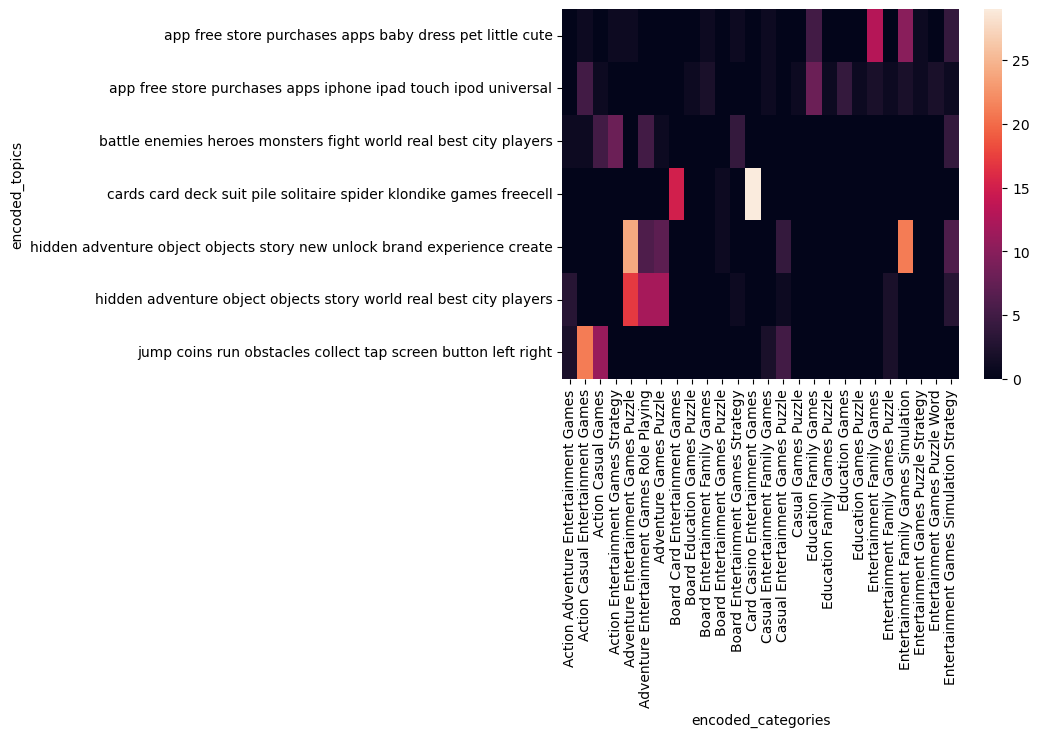

In [70]:
import seaborn as sns
sns.heatmap(filtered_contingency_table, annot=False)
